# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [394]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [395]:
# Read the Mapbox API key
load_dotenv()
mapbox_api_key = os.getenv("MAPBOX_API")

In [398]:
px.set_mapbox_access_token(mapbox_api_key)

# Import Data

In [399]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [411]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    grouped = sfo_data.groupby("year")
    grouped.head()

    mean_housing_units = grouped["housing_units"].agg(np.mean)

    bar_plot = mean_housing_units.plot.bar()
    bar_plot.set_xlabel("Year")
    bar_plot.set_ylabel("Housing Units")
    bar_plot.set_title("Housing Units in San Francisco from 2010 to 2016")
    bar_plot.set_ylim([370000, 387500])

    return bar_plot

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!

    grouped = sfo_data.groupby("year")
    avg_gross_rent = grouped["gross_rent"].agg(np.mean)
    
    
    gross_rent_graph = plt.plot(avg_gross_rent),
    plt.xlabel("Year"),
    plt.ylabel("Gross Rent"),
    plt.title("Average Gross rent in San Fransico")

    return gross_rent_graph

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    grouped = sfo_data.groupby("year")
    
    avg_sqr_foot_price = grouped["sale_price_sqr_foot"].agg(np.mean)

    sales_graph = plt.plot(avg_sqr_foot_price)
    plt.xlabel("Year")
    plt.ylabel("Avg. Sale Price")
    plt.title("Average Sale Price per Square Foot in San Fransico")

    return sales_graph

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    group_year_and_loc = sfo_data.groupby(["year", "neighborhood"])

    average_gross_rent = group_year_and_loc["gross_rent"].agg(np.mean)

    average_sqr_foot_price = group_year_and_loc["sale_price_sqr_foot"].agg(np.mean)

    average_housing_units = group_year_and_loc["housing_units"].agg(np.mean)

    averages_by_year_and_loc = pd.concat([average_sqr_foot_price,average_housing_units, average_gross_rent ], axis=1).reset_index()

    averages_by_year_and_loc.head(10)
    line_graph_interact = average_sqr_foot_price.hvplot(title="Average price per Square Foot in San Francisco")

    line_plot = average_sqr_foot_price.hvplot.line(title="Average price per Square Foot in San Francisco", x="year", y="sale_price_sqr_foot", groupby=["neighborhood"])

    
    return line_plot

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE!
    neighborhoods_mean = sfo_data.groupby("neighborhood")

    mean_for_neighborhoods = neighborhoods_mean["sale_price_sqr_foot"].agg(np.mean)

    mean_for_neighborhoods.sort_values(ascending=False) 

    top_pricey_neighborhoods = mean_for_neighborhoods.sort_values(ascending=False) 

    gross_rent_sf = neighborhoods_mean["gross_rent"].agg(np.mean)

    housing_units_sf = neighborhoods_mean["housing_units"].agg(np.mean)


    top_pricey_neighborhoods.head(10)

    most_expensive_to_live = pd.concat([top_pricey_neighborhoods, housing_units_sf, gross_rent_sf], axis=1).reset_index()

    top_10_neighborhoods = most_expensive_to_live.rename(columns={"index":"neighborhood"})

    top10_most_pricey_places = top_10_neighborhoods.head(10)
    top10_most_pricey_places
    
    top10_most_pricey_places = top_pricey_neighborhoods.head(10)
    bar_10 = px.bar(top10_most_pricey_places, title="Top 10 most Expensive Neighborhoods in San Fransico", labels={"value":"Price", "neighborhood":"Neighborhood"})
    bar_10

    return bar_10


def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
    neighborhoods_mean = sfo_data.groupby("neighborhood")

    mean_for_neighborhoods = neighborhoods_mean["sale_price_sqr_foot"].agg(np.mean)

    mean_for_neighborhoods.sort_values(ascending=False) 

    top_pricey_neighborhoods = mean_for_neighborhoods.sort_values(ascending=False) 

    gross_rent_sf = neighborhoods_mean["gross_rent"].agg(np.mean)

    housing_units_sf = neighborhoods_mean["housing_units"].agg(np.mean)


    most_expensive_to_live = pd.concat([top_pricey_neighborhoods, housing_units_sf, gross_rent_sf], axis=1).reset_index()

    top_10_neighborhoods = most_expensive_to_live.rename(columns={"index":"neighborhood"})

    top_10_neighborhoods.head(10)
    
   
    
    top10_most_pricey_places = top_10_neighborhoods.head(10)
    
    top10_most_pricey_places.sort_values("sale_price_sqr_foot")

    px.parallel_coordinates(top10_most_pricey_places, color="sale_price_sqr_foot")

    top10_graph_sf = px.parallel_coordinates(top10_most_pricey_places, color="sale_price_sqr_foot")
    
    top10_graph_sf

    return top10_graph_sf


def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    neighborhoods_mean = sfo_data.groupby("neighborhood")

    mean_for_neighborhoods = neighborhoods_mean["sale_price_sqr_foot"].agg(np.mean)

    mean_for_neighborhoods.sort_values(ascending=False) 

    top_pricey_neighborhoods = mean_for_neighborhoods.sort_values(ascending=False) 

    gross_rent_sf = neighborhoods_mean["gross_rent"].agg(np.mean)

    housing_units_sf = neighborhoods_mean["housing_units"].agg(np.mean)


    most_expensive_to_live = pd.concat([top_pricey_neighborhoods, housing_units_sf, gross_rent_sf], axis=1).reset_index()

    top_10_neighborhoods = most_expensive_to_live.rename(columns={"index":"neighborhood"})

    top_10_neighborhoods.head(10)
    
   
    
    top10_most_pricey_places = top_10_neighborhoods.head(10)
    
    top10_most_pricey_places.sort_values("sale_price_sqr_foot")
   
    categories_graph = px.parallel_categories(
    top10_most_pricey_places,
    dimensions=[ "neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot")

    return categories_graph





In [414]:
def neighborhood_map():
    neighborhoods_mean = sfo_data.groupby("neighborhood")
    housing_units_sf = neighborhoods_mean["housing_units"].agg(np.mean)
    mean_for_neighborhoods = neighborhoods_mean["sale_price_sqr_foot"].agg(np.mean)
    gross_rent_sf = neighborhoods_mean["gross_rent"].agg(np.mean)
    mean_for_neighborhoods.head()

    mean_values = pd.concat([mean_for_neighborhoods, housing_units_sf, gross_rent_sf], axis=1).reset_index()

    neighborhood_mean_values = mean_values.rename(columns={"neighborhood":"Neighborhood"})

    neighborhood_mean_values.head()
    
    
    data_combination = pd.concat([df_neighborhood_locations, neighborhood_mean_values], join="inner", axis =1)

    Cols = list(data_combination.columns)

    for i,item in enumerate(data_combination.columns):
        if item in data_combination.columns[:i]: Cols[i] = "toDROP"

    data_combination.columns = Cols

    joined_dataframes = data_combination.drop("toDROP",1)

    joined_dataframes.head()
    
    all_stops = px.scatter_mapbox(
    joined_dataframes,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color_continuous_scale=px.colors.cyclical.IceFire,
    color ="gross_rent",
    zoom=4
)

    return all_stops

In [361]:
neighborhood_map()

In [168]:
neighborhood_map()

Row
    [0] Markdown(str)
    [1] Str(list)
    [2] Str(AxesSubplot)
    [3] Str(tuple)

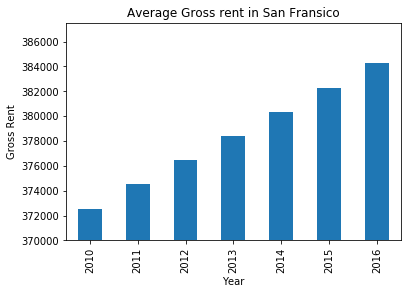

In [415]:
column_gross = pn.Column(average_gross_rent())

bar_mean = pn.Column(housing_units_per_year())

column_salesprice = pn.Column(average_sales_price())

rows = pn.Row("##Averages", average_sales_price(), housing_units_per_year(), average_gross_rent())
rows

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [416]:
# YOUR CODE HERE!
graphs_shiney = pn.Column(
    "## Real Estate Analyzis San Fransico 2010-2016",  parallel_coordinates(), parallel_categories()
)

column_ex = pn.Column(
    "## Prices for Different Neighborhoods", top_most_expensive_neighborhoods(), average_price_by_neighborhood()
)

neighborhood_map_graph = pn.Column("## Average Sale Price Per Square Foot and Gross Rent in San Fransisco", neighborhood_map())

san_fran_analysis = pn.Tabs(
    ("San Fransico Map", neighborhood_map_graph), ("10 Most Expensive Neighborhoods", column_ex), ("Sale Prices and Neighborhoods", graphs_shiney), ("line_graphs", rows)
)


## Serve the Panel Dashboard

In [417]:
san_fran_analysis.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [3] Row
        [0] Markdown(str)
        [1] Str(list)
        [2] Str(AxesSubplot)
        [3] Str(tuple)